# Capstone Two: Data Wrangling

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sbn
import itertools
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [9]:
%pwd

'/home/kc3pve/Desktop/Spring-Git/Springboard'

In [10]:
os.chdir('/home/kc3pve/Desktop/Spring-Data/Springboard/archive')
dir1 = %pwd

In [11]:
%pwd
# Load dataset
data = pd.read_csv(dir1 + '/application_record.csv')
cstory = pd.read_csv(dir1 +'/credit_record.csv')

# Inspect data
cstory.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [12]:
%cd /home/kc3pve/Desktop/Spring-Git/Springboard

/home/kc3pve/Desktop/Spring-Git/Springboard


In [13]:
# remove the restriction on the output of columns
# and let's check number of rows and columns
pd.set_option('display.max_columns', None)

data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [14]:
# Analyse the data...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
data.columns


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

ID:	Client number	
CODE_GENDER:	Gender	
FLAG_OWN_CAR:	Is there a car	
FLAG_OWN_REALTY:	Is there a property	
CNT_CHILDREN:	Number of children	
AMT_INCOME_TOTAL:	Annual income	
NAME_INCOME_TYPE:	Income category	
NAME_EDUCATION_TYPE:	Education level	
NAME_FAMILY_STATUS:	Marital status	
NAME_HOUSING_TYPE:	Way of living	
DAYS_BIRTH:	Birthday Count backwards from current day (0), -1 means yesterday.                  
DAYS_EMPLOYED:	Start date of employment Count backwards from current day(0). 
                If positive, it means the person currently unemployed.                
FLAG_MOBIL:	Is there a mobile phone
FLAG_WORK_PHONE: Is there a work phone
FLAG_PHONE:	Is there a phone	
FLAG_EMAIL:	Is there an email	
OCCUPATION_TYPE:Occupation	
CNT_FAM_MEMBERS:Family size 

In [16]:
# ...and credit record
cstory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [17]:
cstory.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

ID: Client number.	

MONTHS_BALANCE: Record month - 	the month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on.

STATUS: Status	0: 1-29 days past due, 1: 30-59 days past due, 2: 60-89 days overdue, 3: 90-119 days overdue, 4: 120-149 days overdue, 5: Overdue or bad debts, write-offs for more than 150 days. C: paid off that month, X: No loan for the month.

In [18]:
# Check unique values of data

data['ID'].nunique()

# 438510 unique values out of  438557,so we have 47 duplicates.


438510

In [19]:
# There are over 45000 unique data, although there are only more than a million (1048575) of them. 
# This indicates the presence of duplicates, as well as changes in status over time
cstory['ID'].nunique() 

45985

In [29]:
# check the length of intersection of the two data sets
len(set(data['ID']).intersection(set(cstory['ID']))) 

36457

# Data processing and analysis (clearing and etc.)

In [30]:
data.isnull().sum() 

# About a quarter of the data in OCCUPATION_TYPE is lost. 
# In addition, they are of type object - in fact, a regular string. 
# We will have to get rid of this variable

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
dtype: int64

In [31]:
cstory.isnull().sum()


ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [23]:
# Now, we remove duplicates

data = data.drop_duplicates('ID', keep='last')

In [24]:
# We check again the data and see the total number of rows. There should be 438510.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [25]:
# Now, we remove OCCUPATION_TYPE.  It has too many missed data
# Also, we get rid of FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE and FLAG_EMAIL. 
# These parameters do not affect in any way whether a person is creditworthy or not.

data.drop(['OCCUPATION_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis=1, inplace=True) 

In [26]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  CNT_FAM_MEMBERS      438510 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 46.8+ MB


In [27]:
# Now, it's time to parse the data type object. 
# It is necessary to determine whether they have any value for evaluating credit, 
# and also to evaluate the possibility of converting data to a numeric type.

objects_data = pd.DataFrame(data.dtypes =='object').reset_index()
object_type = objects_data[objects_data[0] == True]['index']
object_type


1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [38]:
# First, let's check what data the columns contain so that we can properly train our model. Since we see that 
# there are quite a lot of important parameters, we will try to translate all this into numerical values.

a = data[object_type]['CODE_GENDER'].value_counts()
b = data[object_type]['FLAG_OWN_CAR'].value_counts()
c = data[object_type]['FLAG_OWN_REALTY'].value_counts()
d = data[object_type]['NAME_INCOME_TYPE'].value_counts()
e = data[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = data[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = data[object_type]['NAME_HOUSING_TYPE'].value_counts()

print('\n',a,'\n\n',b,'\n\n',c,'\n\n',d,'\n\n',e,'\n\n',f,'\n\n',g)


 0    294412
1    144098
Name: CODE_GENDER, dtype: int64 

 0    275428
1    163082
Name: FLAG_OWN_CAR, dtype: int64 

 1    304043
0    134467
Name: FLAG_OWN_REALTY, dtype: int64 

 4    226087
0    100739
1     75483
2     36184
3        17
Name: NAME_INCOME_TYPE, dtype: int64 

 4    301789
1    117509
2     14849
3      4051
0       312
Name: NAME_EDUCATION_TYPE, dtype: int64 

 1    299798
3     55268
0     36524
2     27249
4     19671
Name: NAME_FAMILY_STATUS, dtype: int64 

 1    393788
5     19074
2     14213
4      5974
3      3922
0      1539
Name: NAME_HOUSING_TYPE, dtype: int64


In [22]:
#  Converting non-numeric data to numeric data using LabelEncoder().
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes == 'object':
        data[x] = le.fit_transform(data[x])

In [23]:
data.head(10)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1.0


In [24]:
data[['CODE_GENDER']]


,CODE_GENDER
0,1
1,1
2,1
3,0
4,0
...,...
438552,1
438553,0
438554,0
438555,0


<AxesSubplot:ylabel='Frequency'>

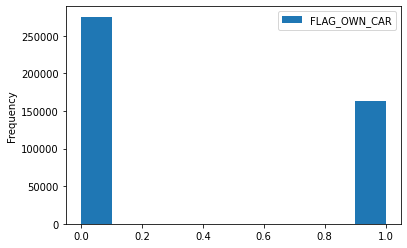

In [36]:
data[['FLAG_OWN_CAR']].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

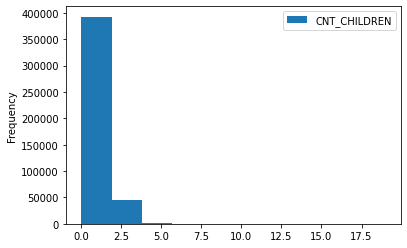

In [34]:
data[['CNT_CHILDREN']].plot(kind='hist')

In [35]:
data[['CNT_CHILDREN']].describe()

,CNT_CHILDREN
count,438510.000000
mean,0.427393
std,0.724887
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,19.000000
